In [7]:
import pandas as pd
df = pd.read_csv("Student Mental health.csv")
print(df)

               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 

In [8]:
df = df.rename(columns={
    "Choose your gender": "gender",
    "Age": "age",
    "What is your course?": "course",
    "Your current year of Study": "year",
    "What is your CGPA?": "cgpa",
    "Marital status": "marital",
    "Do you have Depression?": "depression",
    "Do you have Anxiety?": "anxiety",
    "Do you have Panic attack?": "panic",
    "Did you seek any specialist for a treatment?": "specialist"
})
print(df)

               Timestamp  gender   age              course    year  \
0         8/7/2020 12:02  Female  18.0         Engineering  year 1   
1         8/7/2020 12:04    Male  21.0   Islamic education  year 2   
2         8/7/2020 12:05    Male  19.0                 BIT  Year 1   
3         8/7/2020 12:06  Female  22.0                Laws  year 3   
4         8/7/2020 12:13    Male  23.0        Mathemathics  year 4   
..                   ...     ...   ...                 ...     ...   
96   13/07/2020 19:56:49  Female  21.0                 BCS  year 1   
97   13/07/2020 21:21:42    Male  18.0         Engineering  Year 2   
98   13/07/2020 21:22:56  Female  19.0            Nursing   Year 3   
99   13/07/2020 21:23:57  Female  23.0    Pendidikan Islam  year 4   
100  18/07/2020 20:16:21    Male  20.0  Biomedical science  Year 2   

            cgpa marital depression anxiety panic specialist  
0    3.00 - 3.49      No        Yes      No   Yes         No  
1    3.00 - 3.49      No         

In [9]:
df = df[['age', 'cgpa', 'depression']]
print(df)


      age         cgpa depression
0    18.0  3.00 - 3.49        Yes
1    21.0  3.00 - 3.49         No
2    19.0  3.00 - 3.49        Yes
3    22.0  3.00 - 3.49        Yes
4    23.0  3.00 - 3.49         No
..    ...          ...        ...
96   21.0  3.50 - 4.00         No
97   18.0  3.00 - 3.49        Yes
98   19.0  3.50 - 4.00        Yes
99   23.0  3.50 - 4.00         No
100  20.0  3.00 - 3.49         No

[101 rows x 3 columns]


In [10]:
df['depression'] = df['depression'].map({'Yes':1, 'No':0})
print(df)

      age         cgpa  depression
0    18.0  3.00 - 3.49           1
1    21.0  3.00 - 3.49           0
2    19.0  3.00 - 3.49           1
3    22.0  3.00 - 3.49           1
4    23.0  3.00 - 3.49           0
..    ...          ...         ...
96   21.0  3.50 - 4.00           0
97   18.0  3.00 - 3.49           1
98   19.0  3.50 - 4.00           1
99   23.0  3.50 - 4.00           0
100  20.0  3.00 - 3.49           0

[101 rows x 3 columns]


In [11]:
print(df['cgpa'].unique())
print(df)

['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
      age         cgpa  depression
0    18.0  3.00 - 3.49           1
1    21.0  3.00 - 3.49           0
2    19.0  3.00 - 3.49           1
3    22.0  3.00 - 3.49           1
4    23.0  3.00 - 3.49           0
..    ...          ...         ...
96   21.0  3.50 - 4.00           0
97   18.0  3.00 - 3.49           1
98   19.0  3.50 - 4.00           1
99   23.0  3.50 - 4.00           0
100  20.0  3.00 - 3.49           0

[101 rows x 3 columns]


In [12]:
def convert_cgpa(x):
    x = x.replace(" ", "")           # remove spaces → "3.00-3.49"
    low, high = x.split('-')         # split into two numbers
    return (float(low) + float(high)) / 2   # midpoint

df['cgpa'] = df['cgpa'].apply(convert_cgpa)

In [13]:
df = df.dropna(subset=['age', 'cgpa', 'depression'])
print(df)

      age   cgpa  depression
0    18.0  3.245           1
1    21.0  3.245           0
2    19.0  3.245           1
3    22.0  3.245           1
4    23.0  3.245           0
..    ...    ...         ...
96   21.0  3.750           0
97   18.0  3.245           1
98   19.0  3.750           1
99   23.0  3.750           0
100  20.0  3.245           0

[100 rows x 3 columns]


In [14]:
df['age'] = df['age'].fillna(df['age'].median())
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].median())
print(df)

      age   cgpa  depression
0    18.0  3.245           1
1    21.0  3.245           0
2    19.0  3.245           1
3    22.0  3.245           1
4    23.0  3.245           0
..    ...    ...         ...
96   21.0  3.750           0
97   18.0  3.245           1
98   19.0  3.750           1
99   23.0  3.750           0
100  20.0  3.245           0

[100 rows x 3 columns]


Accuracy score: 0.75
Depression (0 = No, 1 = Yes): 0


c:\Users\kerala\OneDrive\Desktop\ml\sck\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


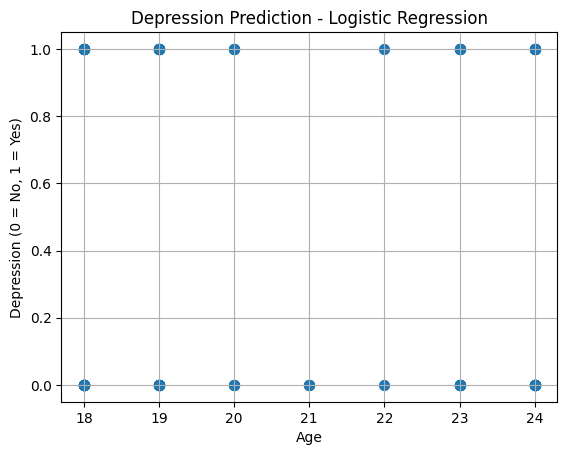

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['age', 'cgpa']]
y = df['depression']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))

new_student = [[20, 3.25]]   
prediction = model.predict(new_student)

print("Depression (0 = No, 1 = Yes):", prediction[0])

plt.scatter(df['age'], df['depression'], s=50)
plt.xlabel("Age")
plt.ylabel("Depression (0 = No, 1 = Yes)")
plt.title("Depression Prediction - Logistic Regression")
plt.grid(True)
plt.show()

Accuracy: 0.8
Prediction: 0
Depression (0 = No, 1 = Yes): 0


c:\Users\kerala\OneDrive\Desktop\ml\sck\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


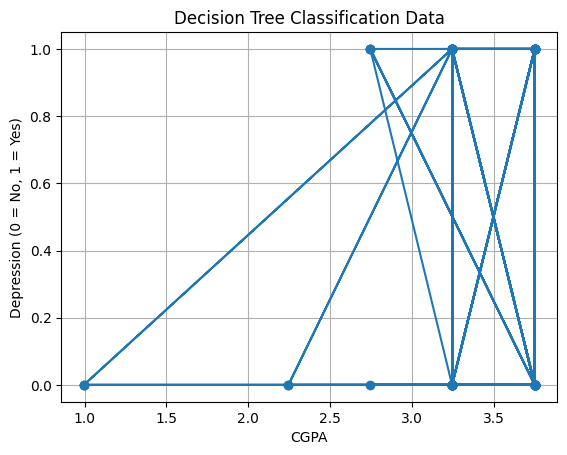

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[['age', 'cgpa']]
y = df['depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

new_student = [[21, 7.8]]   
prediction = model.predict(new_student)[0]

print("Prediction:", prediction)
print("Depression (0 = No, 1 = Yes):", prediction)

plt.plot(df['cgpa'], df['depression'], marker='o')
plt.xlabel("CGPA")
plt.ylabel("Depression (0 = No, 1 = Yes)")
plt.title("Decision Tree Classification Data")
plt.grid(True)
plt.show()


MSE: 0.38088754909350186
R² Score: -0.0025665096397247122
Predicted CGPA: 3.384078247818677


c:\Users\kerala\OneDrive\Desktop\ml\sck\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


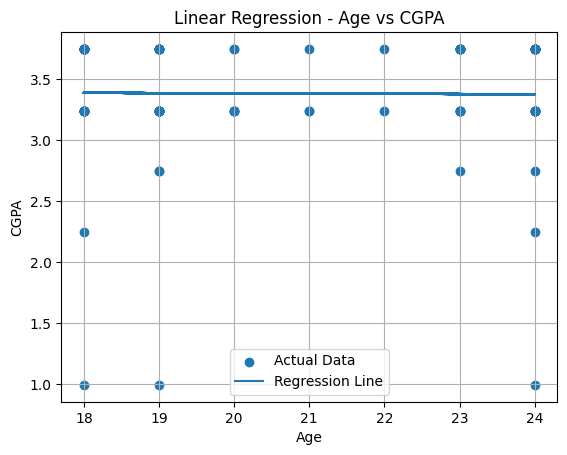

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['age']]      
y = df['cgpa']      

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(Y_test, y_pred))
print("R² Score:", r2_score(Y_test, y_pred))

new_student = [[21]]   
prediction = model.predict(new_student)

print("Predicted CGPA:", prediction[0])

plt.scatter(df['age'], df['cgpa'], label='Actual Data')
plt.plot(df['age'], model.predict(df[['age']]), label='Regression Line')
plt.xlabel("Age")
plt.ylabel("CGPA")
plt.title("Linear Regression - Age vs CGPA")
plt.grid(True)
plt.legend()
plt.show()
